In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

from bs4 import BeautifulSoup
import requests
import urllib
from urllib.request import urlopen
from urllib.parse import urljoin


In [3]:
onetSkills = pd.read_excel('./data/Technology Skills.xlsx')    

In [4]:
onetSkills.head()

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
0,11-1011.00,Chief Executives,Adobe Systems Adobe Acrobat,43232202,Document management software,Y
1,11-1011.00,Chief Executives,AdSense Tracker,43232306,Data base user interface and query software,N
2,11-1011.00,Chief Executives,Atlassian JIRA,43232201,Content workflow software,Y
3,11-1011.00,Chief Executives,Blackbaud The Raiser's Edge,43232303,Customer relationship management CRM software,N
4,11-1011.00,Chief Executives,ComputerEase Construction Accounting,43231601,Accounting software,N


In [6]:
techSkills = onetSkills['Example']
techskills = techSkills.dropna()
onetTechSkills = techSkills.drop_duplicates()
print(len(onetTechSkills))

8836


In [18]:
def count_in(x):
    if len(x)==0:
        return 0
    else:
        return 1


In [37]:
def indeed_scraper(link,num_pages):
    lang = ["Outlook","Word","PowerPoint","Acrobat","Python","R","SQL","Delphi","Publisher","SPSS","InnQuest","Remesys",
            'SAS', 'Excel','Facebook','Yardi','FrontDesk']

#     tech_skills = onetTechSkills
    df1 = pd.DataFrame([],columns = lang)


    dfExport = pd.DataFrame([],columns =[''])
    for i in range(num_pages):
        page = urlopen(link)
        soup = BeautifulSoup(page, 'lxml')
        #remember this
        numPosts = soup.findAll(attrs={'rel':['nofollow']})
        for j in numPosts:
            rawPostPages = "http://indeed.com/m/"+j['href']
            response = requests.get(rawPostPages)
#        link in text format
            postPage = response.text
            postSoup = BeautifulSoup(postPage,'lxml')
            postDesc = postSoup.findAll('div',attrs={'id':['desc']})
            sum_py = 0
            sum_C = 0
            sum_Cplus = 0
            sum_java = 0
            sum_javascript = 0
            sum_r = 0
            sum_sql = 0
            sum_hadoop = 0
            sum_hive = 0
            sum_pig = 0
            sum_spark = 0
            sum_aws = 0 
            sum_tableau = 0
            sum_sas= 0 

            sum_Word = 0
            sum_ex = 0
            sum_SAS = 0
            sum_Yardi = 0
            sum_FrontDesk = 0
            sum_Ramesys = 0
            sum_Facebook = 0
            sum_InnQuest = 0
            sum_Publisher = 0
            sum_SPSS = 0
            sum_Delphi = 0
            sum_Acrobat = 0
            sum_PowerPoint = 0
            sum_Word = 0
            sum_Outlook = 0
            sum_InnQuest= 0


            SAS = re.findall(r'[\b\s\/]SAS\b[\/\s,]', str(postDesc))
            SAS2 = count_in(SAS)
            sum_SAS = sum_SAS + SAS2

            Yardi = re.findall(r'[\b\s\/]Yardi\b[\/\s,]', str(postDesc))
            Yardi2 = count_in(Yardi)
            sum_Yardi = sum_Yardi + Yardi2

            FrontDesk = re.findall(r'[\b\s\/]FrontDesk\b[\/\s,]', str(postDesc))
            FrontDesk2 = count_in(FrontDesk)
            sum_FrontDesk = sum_FrontDesk + FrontDesk2

            Ramesys = re.findall(r'[\b\s\/]Ramesys\b[\/\s,]', str(postDesc))
            Ramesys2 = count_in(Ramesys)
            sum_Ramesys = sum_Ramesys + Ramesys2

            Facebook = re.findall(r'[\b\s\/]Facebook\b[\/\s,]', str(postDesc))
            Facebook2 = count_in(Facebook)
            sum_Facebook = sum_Facebook + Facebook2

            InnQuest = re.findall(r'[\b\s\/]InnQuest\b[\/\s,]', str(postDesc))
            InnQuest2 = count_in(InnQuest)
            sum_InnQuest = sum_InnQuest + InnQuest2

            Publisher = re.findall(r'[\b\s\/]Publisher\b[\/\s,]', str(postDesc))
            Publisher2 = count_in(Publisher)
            sum_Publisher = sum_Publisher + Publisher2

            SPSS = re.findall(r'[\b\s\/]SPSS\b[\/\s,]', str(postDesc))
            SPSS2 = count_in(SPSS)
            sum_SPSS = sum_C + SPSS2


            Delphi = re.findall(r'[\b\s\/]Delphi\b[\/\s,]', str(postDesc))
            Delphi2 = count_in(Delphi)
            sum_Delphi = sum_Delphi + Delphi2

            Acrobat = re.findall(r'[\b\s\/]Acrobat\b[\/\s,]', str(postDesc))
            Acrobat2 = count_in(Acrobat)
            sum_Acrobat = sum_Acrobat + Acrobat2

            PowerPoint = re.findall(r'[\b\s\/]PowerPoint\b[\/\s,]', str(postDesc))
            PowerPoint2 = count_in(PowerPoint)
            sum_PowerPoint = sum_PowerPoint + PowerPoint2
            
            Word = re.findall(r'[\b\s\/]Word\b[\/\s,]', str(postDesc))
            Word2 = count_in(Word)
            sum_Word = sum_Word + Word2

            
            Outlook = re.findall(r'[\b\s\/]Outlook\b[\/\s,]', str(postDesc))
            Outlook2 = count_in(Outlook)
            sum_Outlook = sum_Outlook + Outlook2

            c_plus = re.findall(r'[\b\/\s]?C\+\+[\s,]?', str(postDesc))
            c_plus2 = count_in(c_plus)
            sum_Cplus = sum_Cplus + c_plus2

            java = re.findall(r'[\/\b\s]?Java[\b,\/]?', str(postDesc))
            java2 = count_in(java)
            sum_java = sum_java + java2

            javascript = re.findall(r'[\/\s\b]Java[Ss]cript[\/\b\s,]?', str(postDesc))
            javascript2 = count_in(javascript)
            sum_javascript = sum_javascript + javascript2

            python = re.findall(r'[\/\b]?[Pp]ython[\s\/,]?', str(postDesc))
            python2 = count_in(python)
            sum_py = sum_py + python2

            R = re.findall(r'[\s\/\b]?R[\b\s\/,]', str(postDesc))
            R2 = count_in(R)
            sum_r = sum_r + R2

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(postDesc))
            sql2 = count_in(sql)
            sum_sql = sum_sql + sql2

            hadoop = re.findall(r'[\/\b]?Hadoop[\s\/,]?', str(postDesc))
            hadoop2 = count_in(hadoop)
            sum_hadoop = sum_hadoop + hadoop2

            hive = re.findall(r'[\/\b]?Hive[\s\/,]?', str(postDesc))
            hive2 = count_in(hive)
            sum_hive = sum_hive + hive2

            pig = re.findall(r'[\/\b]?Pig[\s\/,]?', str(postDesc))
            pig2 = count_in(pig)
            sum_pig = sum_pig + pig2

            spark = re.findall(r'[\/\b]?Spark[\s\/,]?', str(postDesc))
            spark2 = count_in(spark)
            sum_spark = sum_spark + spark2

            aws = re.findall(r'[\/\b]?AWS[\s\/,]?', str(postDesc))
            aws2 = count_in(aws)
            sum_aws = sum_aws + aws2

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(postDesc))
            tab2 = count_in(tableau)
            sum_tableau = sum_tableau + tab2
            
            sas = re.findall(r'[\/\b\/]?SAS[\s\/,]?', str(postDesc))
            sas2 = count_in(sas)
            sum_sas = sum_sas + sas2
            
            excel = re.findall(r'[\/\b\/]?[Ee]xcel[\s\/,]?', str(postDesc))
            ex2 = count_in(excel)
            sum_ex = sum_ex + ex2

            df2 = pd.DataFrame([[sum_Word,sum_PowerPoint,sum_ex,sum_Acrobat,sum_Delphi,sum_Facebook,sum_Ramesys,sum_SAS,sum_Yardi,sum_Publisher,
                                 sum_SPSS,sum_FrontDesk,sum_py,sum_r,sum_sql,sum_sas,sum_InnQuest]], columns = lang)

            
            # df2 = pd.DataFrame([[sumCount]],columns=tech_skills)
            df1 = pd.concat([df2,df1],axis =0)
            #Save job desc
            dfTemp = pd.DataFrame([[postDesc]],columns =['Description'])
#             sf= pd.DataFrame([sum_Word,sum_PowerPoint,sum_ex,sum_Acrobat,sum_Delphi,sum_Facebook,sum_Ramesys,sum_SAS,sum_Yardi,sum_Publisher,
#                                  sum_SPSS,sum_FrontDesk,sum_py,sum_r,sum_sql,sum_sas,sum_InnQuest],columns=lang)
            dfTemp2 = pd.concat([df1,dfTemp],axis = 1)
            dfExport = pd.concat([dfExport,dfTemp2],axis = 0)
#         Next page
        nextURL = soup.findAll(attrs = {'rel' : ['next']})
    #Next link is replaced
        print('Scraping in progress... ',nextURL)

        link = 'http://www.indeed.com/m/'+ str(nextURL[0]['href'])
    #now lets save all our data
    df1.reset_index(inplace =True)
    df1.drop('index',inplace =True,axis =1)
    df3 = df1.sum(axis=0)
    df4 =pd.DataFrame(df3,columns =['Count'])
    df4.reset_index(inplace=True)
#     change column names
    df4.rename({'index':'tech_skills'},inplace = True,axis = 1)
    totalPosts = len(df1)
    print("total job posts: ", totalPosts)
#     dfExport.drop(',inplace =True,axis =1)
#     dfExport = pd.concat([dfExport,df1],axis=0)
    dfExport.to_excel('./data/jobdes.xlsx')
    df1.to_excel('./data/df1.xlsx')
    df4.to_excel('./data/df4.xlsx')
    

    return (df1,df4,totalPosts)

In [39]:
num_pages = 1
link= 'https://www.indeed.com/m/jobs?q=data+science&l='
results, clean_results, total_jobs = indeed_scraper(link,num_pages)

C:\Users\as630696\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:176: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Scraping in progress...  [<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
total job posts:  10


In [50]:
def plot_count(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    plt.figure(figsize = (30,12))
    sns.barplot(x='tech_skills', y='Count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Skill',fontsize=15)
    plt.ylabel('Count: '+str(total_jobs),fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')


Number of Jobs: 10
   tech_skills  Count
0      Outlook    1.0
1         Word    1.0
2   PowerPoint    4.0
3      Acrobat    0.0
4       Python    0.0
5            R    0.0
6          SQL    0.0
7       Delphi    1.0
8    Publisher    0.0
9         SPSS    0.0
10    InnQuest    0.0
11     Remesys    0.0
12         SAS    5.0
13       Excel    2.0
14    Facebook    0.0
15       Yardi    1.0
16   FrontDesk    0.0


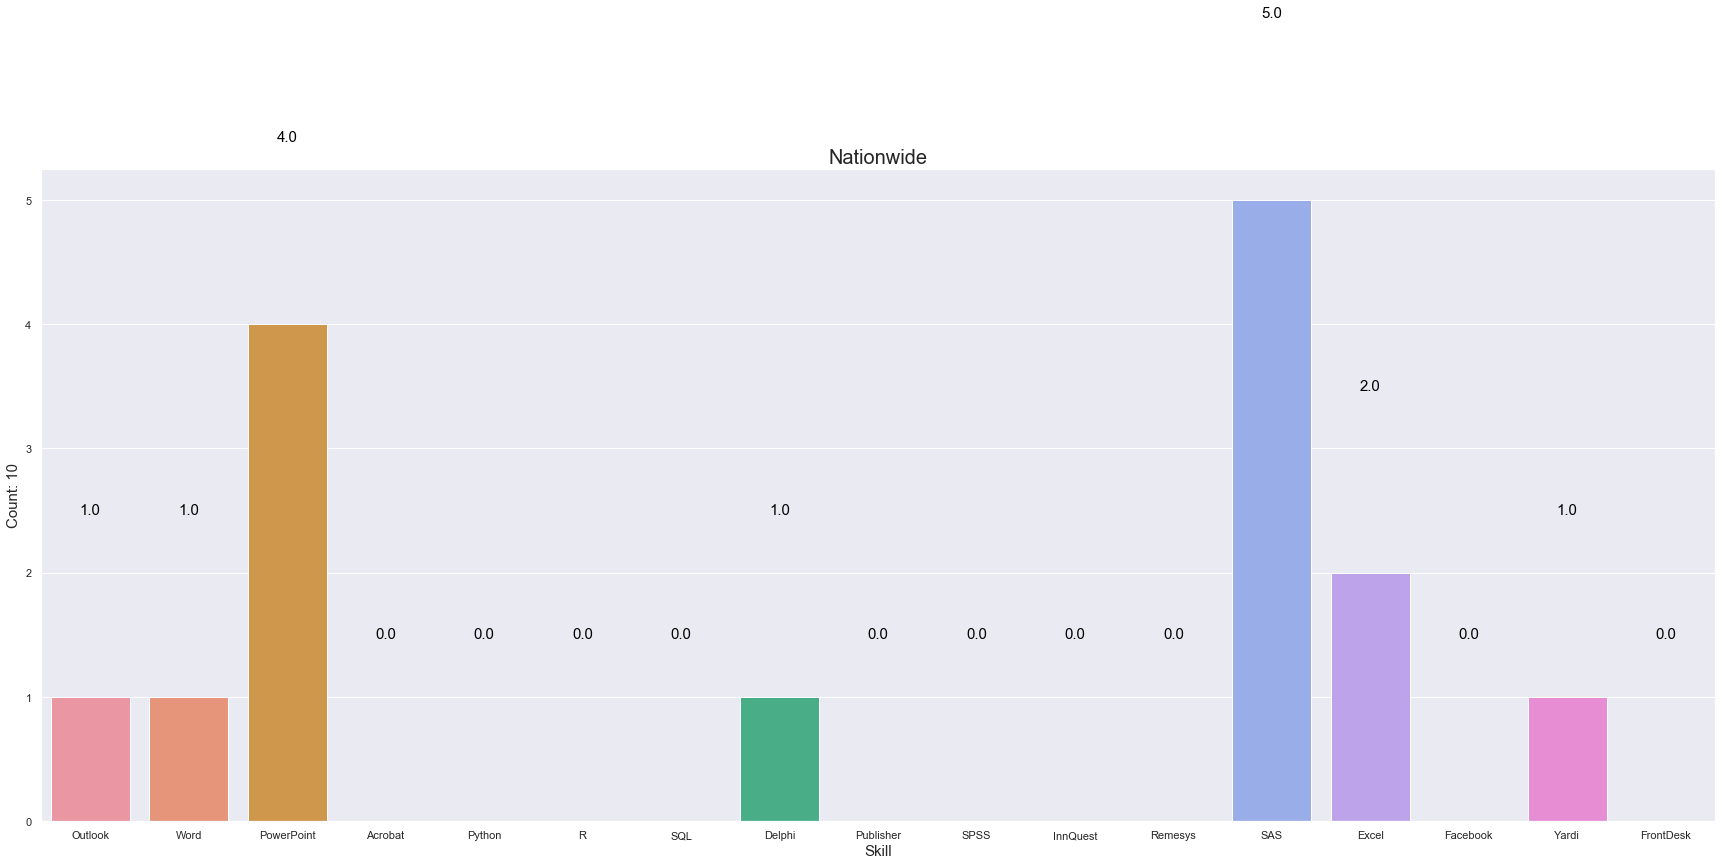

In [51]:
plot_count(clean_results, total_jobs, 'Nationwide')
